# Classificação de Vidros

Esta base de dados é de origem do Kaggle (disponível em: https://www.kaggle.com/uciml/glass). Este trabalho tem por intuito obter a base de dados do Kaggle, explorar os dados para obter *insights*, analisar e treinar modelos de *Machine Learning* (ML) e verificar se é possível classificar adequadamente os tipos de vidro. Este *Jupyter Notebook* está dividido nos seguintes tópicos:

1. Análise Exploratória dos Dados (EDA)
2. Visualização de Dados
3. Pré processamento
4. Modelo de *Machine Learning*
5. Resultados

### Importando bibliotecas

In [56]:
#data manipulation
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

#set color pallete to pictures
sns.set_palette(palette='Set2')
sns.set_style('darkgrid')

#Reading data
file_path = './data/glass.csv'
df = pd.read_csv(file_path)

## 1. Análise Exploratória dos Dados

Primeiramente vamos olhar para o cabeçário dos dados, isto é, para as primeiras linhas da base de dados. É possível observar que os dados são unicamente numéricos.

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


A base de dados possui 214 entradas e 10 colunas. Todos os atributos são números flutuantes, a coluna 'Type' é do tipo inteiro e não existem campos vazios, como mostra abaixo *non-null* para todos os atributos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [57]:
# Mostrar as colunas
print('Colunas: {}'.format(df.columns.values))

#Mostrar a quantidade de amostras de cada classe
print('Classes: {}'.format(df['Type'].unique()))

Colunas: ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
Classes: [1 2 3 5 6 7]


A base de dados possui 10 colunas, sendo as 9 primeiras as features e a última o tipo de vidro. Cada feature significa:
* RI - Índice de Fefração
* Na - Sódio (unidade de medida: peso percentual no óxido correspondente, como o restante das features)
* Mg - Magnésio
* Al - Alumínio
* Si -Silício
* K - Potássio
* Ca - Cálcio
* Ba - Bário
* Fe - Ferro

As classes correspondem de 1 a 9 para cada tipo de vidro, tal que:
* 1 - construção de janelas flutuante processado
* 2 - building_windows_non_float_processed 
* 3 - vehicle_windows_float_processed 
* 4 - vehicle_windows_non_float_processed
* 5 - containers 
* 6 - tableware 
* 7 - headlamps

Percebe-se que na saída do código acima, em "Classes", não há o tipo 4. Isto é, não existe amostra para a classe 4.

Agora vamos investigar se, na média, os tipos de vidro possuem diferentes concentrações de elementos. Para isto, veja a tabela a seguir:

In [66]:
df.groupby('Type').mean()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


## 2. Visualização de Dados

Primeiramente, vamos investigar a quantidade de vidros por tipo:

Text(0, 0.5, 'Quantidade de Amostras')

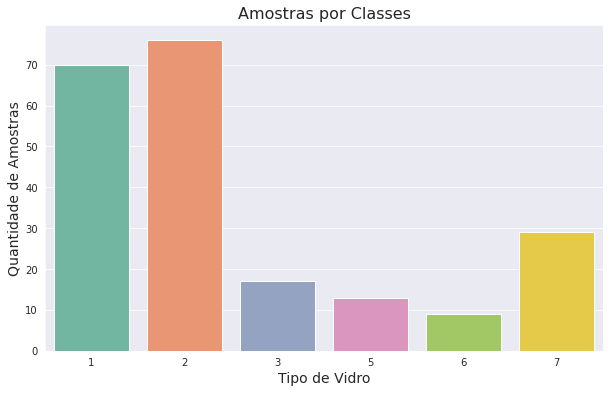

In [71]:
plt.figure(figsize=(10,6))
plt.title('Amostras por Classes', fontsize=16)
sns.countplot(x='Type',data=df)
plt.xlabel('Tipo de Vidro', fontsize=14)
plt.ylabel('Quantidade de Amostras', fontsize=14)

É perceptível que as classes 1 e 2 possuem mais amostras. Além disso, não existe amostra para a classe 4. Por haver quantidades diferentes de vidro por classe é preciso ter cuidado para modelar e pesar classes desbalanceadas.

Agora queremos investigar se há alguma correlação entre os elementos químicos na composição do vidro. Para isto, foi criada uma matriz de correlação que consiste em calcular em termos percentuais a taxa de correlação linear entre duas variáveis. Para melhor visualização dessa matriz, vamos visualizá-la em um mapa de calor:

<AxesSubplot:>

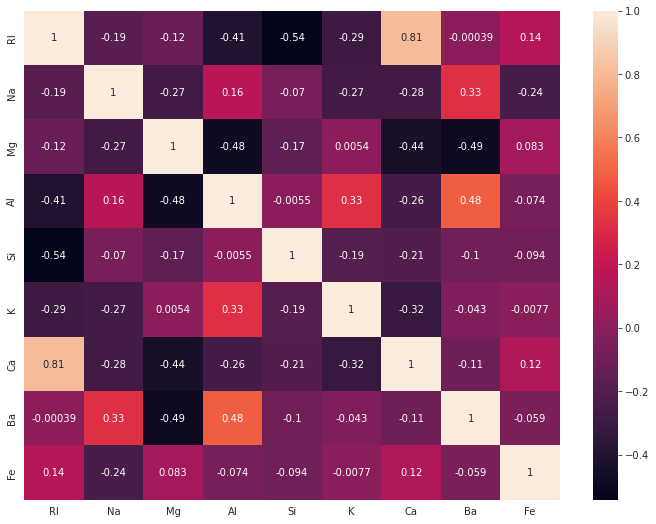

In [97]:
plt.figure(figsize=(12,9))
sns.heatmap(df.drop('Type',axis=1).corr(), annot=True)

Pode-se perceber que os elementos mais claros possuem maior correlação, os mais escuros correlação inversa e os intermediários possuem pouca correlação linear. Por exemplo, a maior correlação de atributos são o Índice de Refração (RI) e o elemento Cálcio (Ca) de valor 0.81. Por outro lado, o Índice de Refração (RI) e o Silício (Si) possui o valor mais negativo de -0.51, sugerindo uma correlação inversa.

Vamos olhar mais de perto essas duas correlações citadas:

Text(0.5, 0.98, 'Correlação entre os elementos')

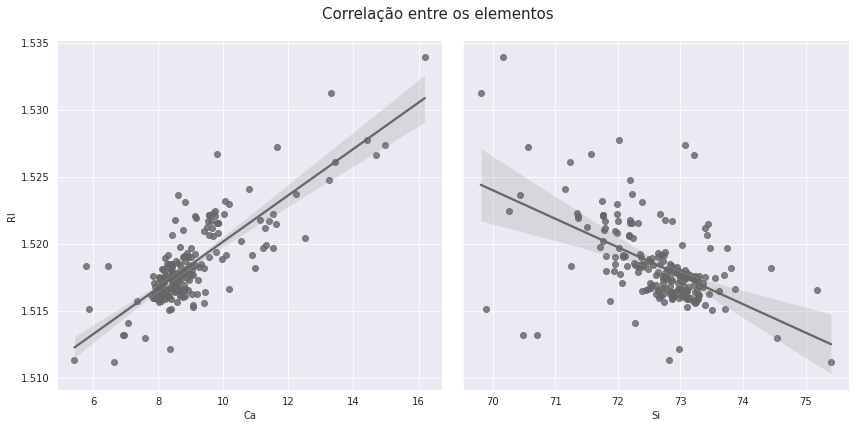

In [109]:
g = sns.PairGrid(df, y_vars=["RI"], x_vars=["Ca", "Si"], height=6)
g.map(sns.regplot, color=".4")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlação entre os elementos', fontsize=15)

De fato, para o primeiro exemplo entre Ca e RI a tendência linear é de aumento entre as duas variáveis, ao passo que, o segundo exemplo entre Si e RI é de tendência linear negativa entre as duas variáveis.

## 3. Pré processamento

Como vamos trabalhar com alguns algoritmos de ML lineares é preciso que estes dados estejam escalonados. Para isto vamos utilizar StandScaler para esta tarefa e utilizar o X_scaled para os algoritmos de ML que precisarem mesmo. Para árvores de decisão isto não necessário.

In [12]:
# Dados originais
X = df.drop(labels='Type',axis=1).values
y = df['Type'].values

# Dados escalados no X_scaled
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## 4. Modelo de Machine Learning

### 4.1 Decision Trees

Primeiro vamos utilizar uma árvore de decisão e avaliar suas características:

In [69]:
# data not scaled for decision trees
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.676923076923077

Temos um score de 0.67 para o treinamento acima. Contudo, este valor somente não me dá informações relevantes sobre o treinamento do modelo. Para isto, vamos visualizar a importância das *features* segundo este treinamento:

In [76]:
df_decisionTree = pd.Series(dt.feature_importances_, index=df.columns.values[0:-1])

<AxesSubplot:title={'center':'Elementos mais importantes'}>

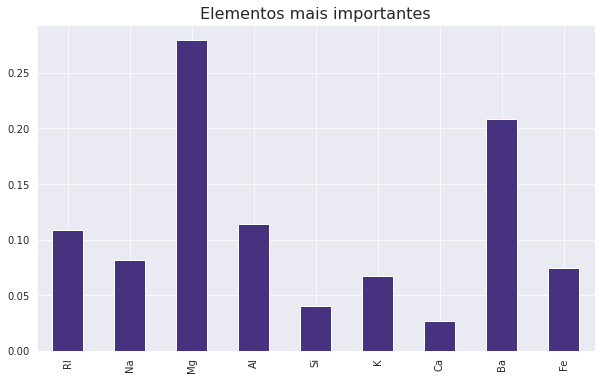

In [138]:
sns.set_palette('viridis')
plt.figure(figsize=(10,6))
plt.title('Elementos mais importantes', fontdict= {'size': 16})
df_decisionTree.plot.bar()

<AxesSubplot:title={'center':'Magnésio x RI'}, xlabel='Mg', ylabel='RI'>

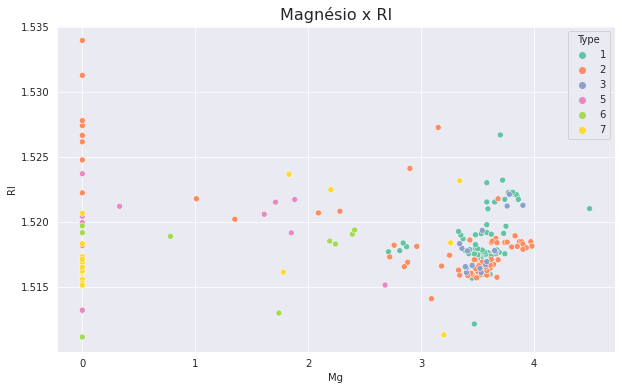

In [108]:
plt.figure(figsize=(10,6))
plt.title('Magnésio x RI', fontdict= {'size': 16})
sns.scatterplot(data=df, x='Mg', y='RI', hue='Type', palette='Set2')

<AxesSubplot:title={'center':'Ba x RI'}, xlabel='Ba', ylabel='RI'>

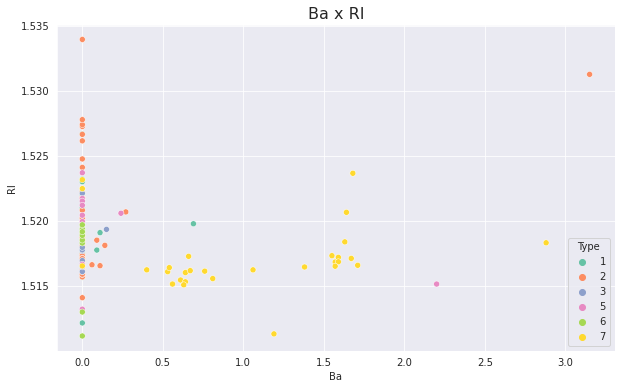

In [109]:
plt.figure(figsize=(10,6))
plt.title('Ba x RI', fontdict= {'size': 16})
sns.scatterplot(data=df, x='Ba', y='RI', hue='Type', palette='Set2')

<AxesSubplot:ylabel='None'>

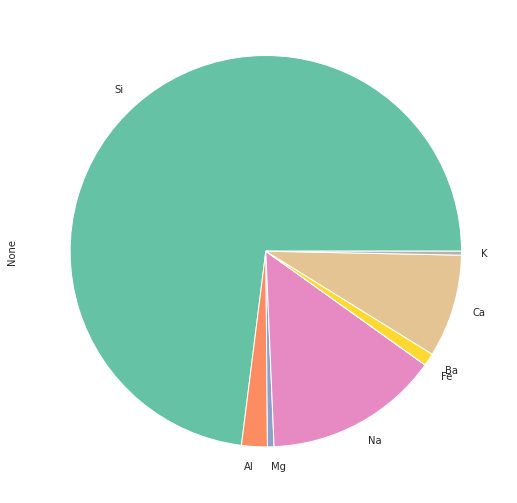

In [135]:
sns.set_palette('Set2')
plt.figure(figsize=(9,9))
df[df['Type'] == 7]['Si Al Mg Na Fe Ba Ca K'.split()].mean().plot.pie()

É perceptível que os elementos Mg e Ba são os mais relevantes segundo este treinamento.

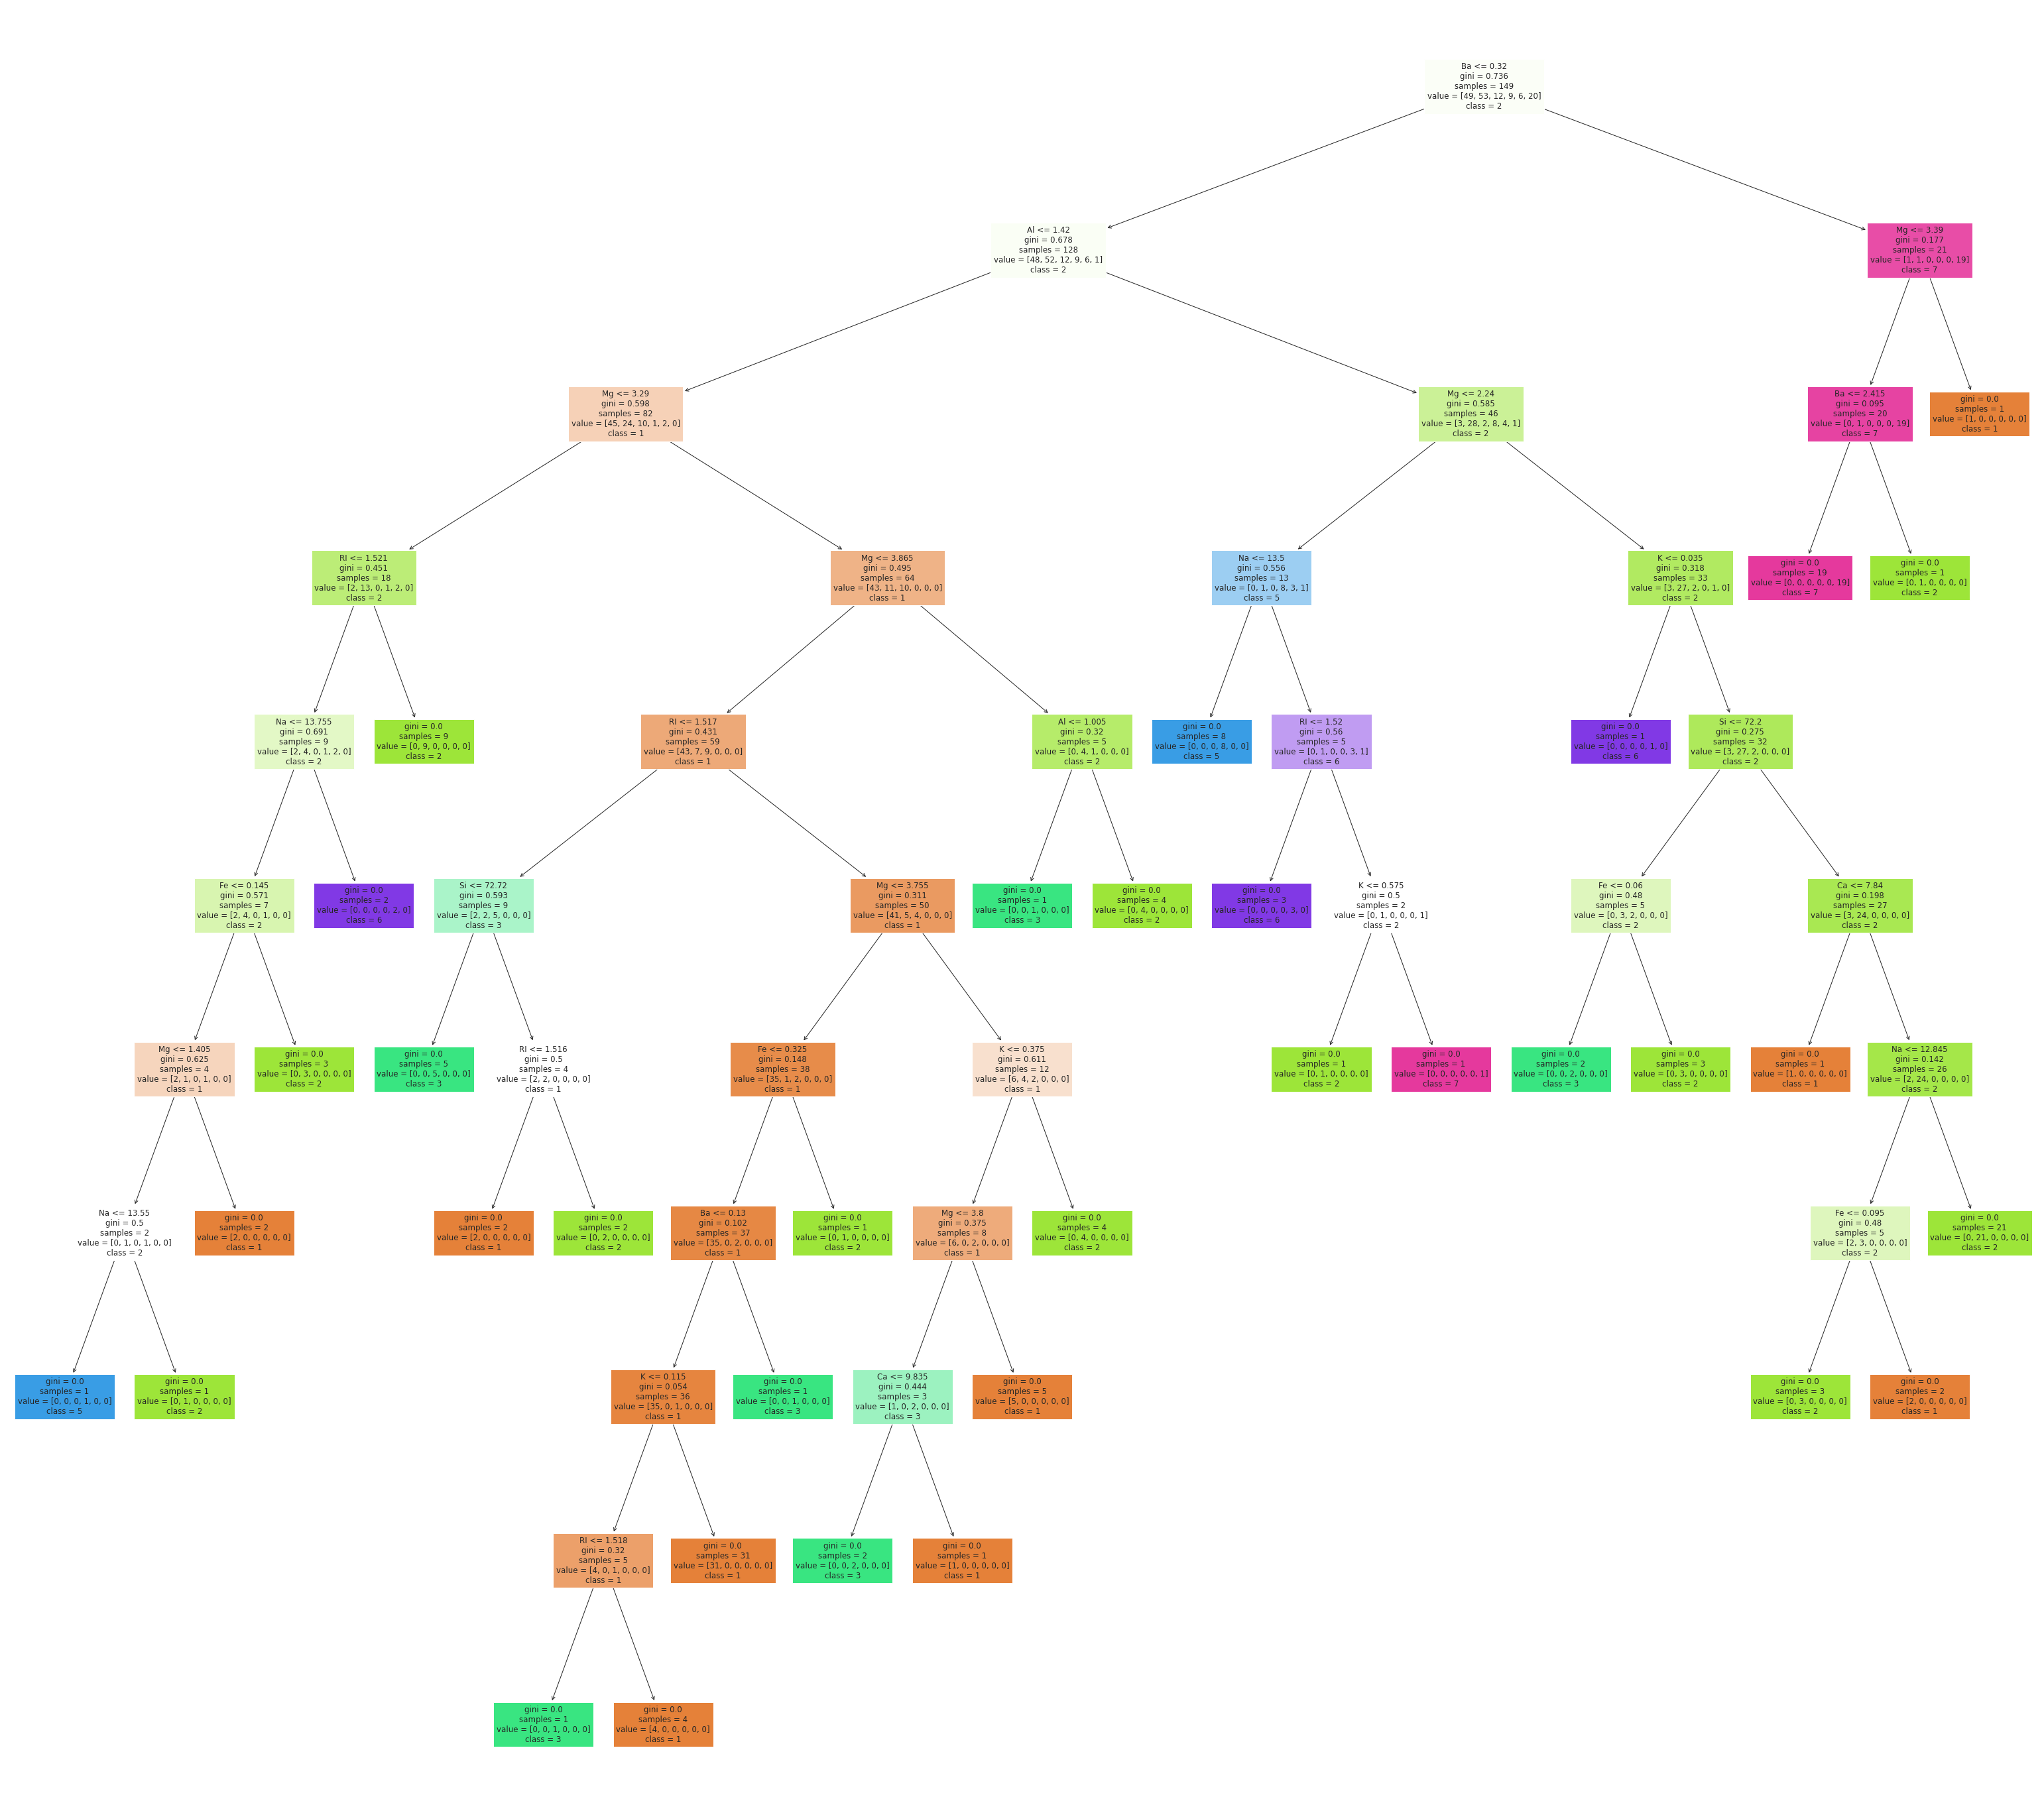

In [110]:
fig = plt.figure(figsize=(55,50))
_ = plot_tree(dt, 
                   feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],  
                   class_names=['1','2','3','5','6','7'],
                   filled=True)


Primeiramente será necessário separa os dados de treino e teste:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=101)

In [53]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(penalty='l2',solver='lbfgs')
scores = cross_val_score(lr, X_train, y_train, cv=5)
scores

array([0.66666667, 0.63333333, 0.6       , 0.7       , 0.51724138])

In [55]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7248322147651006